## 🎓 Campus Placement Prediction App

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
clg = pd.read_csv('college_placement.csv')
clg.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [4]:
print(clg.columns)

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')


In [5]:
clg.shape

(45000, 15)

In [6]:
print("Duplicate Values:", clg.duplicated().sum())

Duplicate Values: 0


In [7]:
clg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

In [8]:
print(f"Check a Null Values\n{clg.isna().sum()}")

Check a Null Values
Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64


In [9]:
clg.head(1)

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed


In [10]:
clg['Gender'].value_counts()

Gender
Female    22620
Male      22380
Name: count, dtype: int64

In [11]:
clg['Degree'].value_counts()

Degree
B.Sc      11357
B.Tech    11305
MCA       11289
BCA       11049
Name: count, dtype: int64

In [12]:
clg['Branch'].value_counts()

Branch
ME       9056
ECE      9026
CSE      8989
Civil    8981
IT       8948
Name: count, dtype: int64

In [13]:
clg['Placement_Status'].value_counts()

Placement_Status
Not Placed    28688
Placed        16312
Name: count, dtype: int64

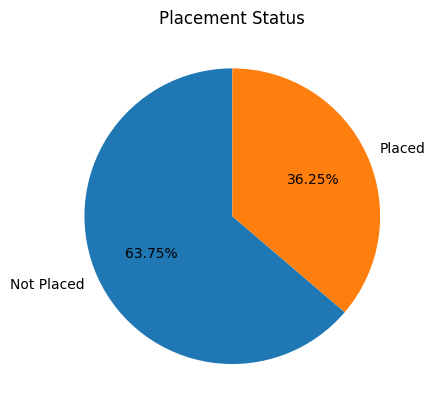

In [14]:
# Create Pie Graph to Visualized Placement Feature
labels = ['Not Placed', 'Placed']
plt.pie(clg['Placement_Status'].value_counts(), autopct='%.2f%%', startangle=90, labels=labels)
plt.title('Placement Status')
plt.show()

In [15]:
# Group by Feature to Explain Clearly Placement Status with Graph Visualization
count_df = clg.groupby('Degree')['Placement_Status'].value_counts().reset_index(name='Count')

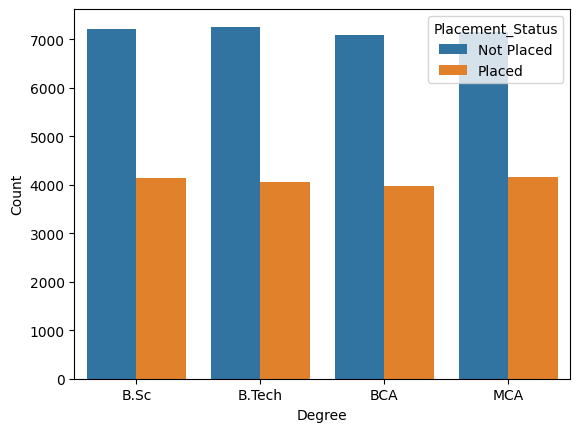

In [16]:
sns.barplot(data=count_df, x='Degree', y='Count', hue='Placement_Status')
plt.show()

In [17]:
clg['CGPA'].value_counts()

CGPA
4.50    271
6.90    207
6.57    201
7.30    198
6.92    198
       ... 
9.78      3
9.77      3
9.58      2
9.65      2
9.73      1
Name: count, Length: 531, dtype: int64

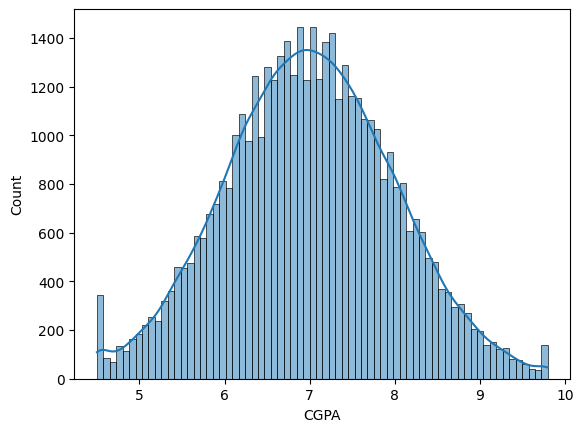

In [18]:
# Create Histogram plot in CGPA Feature
sns.histplot(data=clg, x='CGPA', kde=True)
plt.show()

### Data Preprocessing

In [47]:
clg.drop('Student_ID', axis=1, inplace=True)

In [ ]:
clg.head()

## Models Creation with scikit learn

In [49]:
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [50]:
x = clg.drop('Placement_Status', axis=1)
y = clg['Placement_Status']  # Target Feature

In [51]:
# Dependent Feature Convert Binary to Numeric number
label = LabelEncoder()
le_y = label.fit_transform(y)

In [52]:
# Using a ColumnTransformer 
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=['int64', 'float64'])),
        ('cat', OneHotEncoder(handle_unknown= 'ignore'), make_column_selector(dtype_include=['object']))
    ]
)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

## Train Test Split

In [71]:
# Train Test Split  ( Traning data 80% And Testing Data 20%)
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [82]:
# Create a multiple Models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    'SVM' : SVC()
}


### Creat pipeline and predict test data
#### Evalution Matrix

In [106]:
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_test)
    print(name, 'accuracy', accuracy_score(y_test, preds))
    print(name, 'confusion matrix\n', confusion_matrix(y_test, preds))
    print(name, 'Classification report\n', classification_report(y_test, preds))

Logistic Regression accuracy 0.865
Logistic Regression confusion matrix
 [[5155  583]
 [ 632 2630]]
Logistic Regression Classification report
               precision    recall  f1-score   support

  Not Placed       0.89      0.90      0.89      5738
      Placed       0.82      0.81      0.81      3262

    accuracy                           0.86      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.86      0.86      0.86      9000

KNN accuracy 0.9265555555555556
KNN confusion matrix
 [[5263  475]
 [ 186 3076]]
KNN Classification report
               precision    recall  f1-score   support

  Not Placed       0.97      0.92      0.94      5738
      Placed       0.87      0.94      0.90      3262

    accuracy                           0.93      9000
   macro avg       0.92      0.93      0.92      9000
weighted avg       0.93      0.93      0.93      9000

Decision Tree accuracy 1.0
Decision Tree confusion matrix
 [[5738    0]
 [   0 3262]]
Decision 

## Final algorithm select (SVC)

In [108]:
final_pipe = Pipeline([
    ('preprocess', preprocess),
        ('model', SVC(kernel='linear', probability=True))
])
final_pipe.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Save The Model

In [109]:
import joblib
joblib.dump(final_pipe, 'Campus_placement_svm.pkl ')

['Campus_placement_svm.pkl ']

#### Load Model to predict test data or NewData

In [112]:
loaded_model = joblib.load('Campus_placement_svm.pkl')
pred = loaded_model.predict(x_test)

In [114]:
pred

array(['Not Placed', 'Placed', 'Not Placed', ..., 'Not Placed', 'Placed',
       'Not Placed'], shape=(9000,), dtype=object)

In [115]:
x_train.columns

Index(['Age', 'Gender', 'Degree', 'Branch', 'CGPA', 'Internships', 'Projects',
       'Coding_Skills', 'Communication_Skills', 'Aptitude_Test_Score',
       'Soft_Skills_Rating', 'Certifications', 'Backlogs'],
      dtype='object')